# OpenClassrooms - parcours Data Analyst Business Intelligence - P8

# Milestone 1 - Analyse des données

Dans cette partie nous allons analyser le jeu de données que nous avons à notre disposition. Notre objectif est de comprendre les relations entre les variables, et surtout, celles qui influent sur le prix des transactions immobilières. Grâce à ce travail, nous pourrons ne conserver que les variables qui seront utiles à l'apprentissage de notre algorithme.

## 1.Type des données

La première étape à réaliser est d'importer les données dans le notebook et d'opérer des transformations sur les variables si celles-ci s'imposent (exemple : nettoyage ou changement de type des variables, etc.).

In [117]:
#On importe les librairies que nous utiliserons pour traiter les données et les visualiser
import pandas as pd, numpy as np
# N'oubliez pas d'avoir installé les librairies pandas, numpy et matplotlib via la commande pip

In [118]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt

In [119]:
#On importe les données dans un dataframe


In [120]:
df_historique = pd.read_excel('/content/historique_immobilier_paris_2017_2021_vdef2.xlsx')
df_portefeuille = pd.read_excel('/content/portefeuille_actifs+(3).xlsx')

Attention, si l'opération ci-dessus ne marche pas, il se peut que le package "openpyxl" ne soit pas présent sur votre ordinateur. Si c'est le cas vous pouvez l'installer en éxécutant la commande : pip install openpyxl ou conda install openpyxl.

In [121]:
#On vérifie que le type des données attribué par pandas est cohérent


In [122]:
df_historique.dtypes

,0
date_mutation,datetime64[ns]
valeur_fonciere,float64
adresse_numero,int64
adresse_nom_voie,object
code_postal,int64
nom_commune,object
code_type_local,int64
type_local,object
surface_reelle,int64


In [123]:
pd.options.display.float_format = '{:,.2f}'.format
display(df_historique.head())


,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,code_type_local,type_local,surface_reelle
0,2017-01-03,"550,559.68",8,RUE DES COUTURES SAINT GERVAIS,75003,Paris 3e Arrondissement,2,Appartement,50
1,2017-01-12,"1,576,492.46",32,AV MARCEAU,75008,Paris 8e Arrondissement,2,Appartement,163
2,2017-01-10,"657,757.36",52,RUE DU FAUBOURG SAINT HONORE,75008,Paris 8e Arrondissement,2,Appartement,66
3,2017-01-10,"250,086.82",64,RUE DU VERTBOIS,75003,Paris 3e Arrondissement,2,Appartement,22
4,2017-01-13,"176,266.71",25,RUE DES LAVANDIERES STE OPPORT,75001,Paris 1er Arrondissement,2,Appartement,15


In [124]:
df_portefeuille.dtypes

,0
adresse_numero,int64
adresse_nom_voie,object
code_postal,int64
code_commune,int64
nom_commune,object
surface_carrez,float64
code_type_local,int64
type_local,object
surface_reelle_bati,int64
nombre_pieces_principales,int64


Modifions le type de code postal

In [125]:
df_historique["code_postal"] = df_historique["code_postal"].astype(str)
df_portefeuille["code_postal"] = df_historique["code_postal"].astype(str)
df_historique["adresse_numero"] = df_historique["adresse_numero"].astype(str)
df_portefeuille["adresse_numero"] = df_portefeuille["adresse_numero"].astype(str)
df_portefeuille["code_commune"] = df_portefeuille["code_commune"].astype(str)

print(df_historique.dtypes)
print(df_portefeuille.dtypes)

date_mutation       datetime64[ns]
valeur_fonciere            float64
adresse_numero              object
adresse_nom_voie            object
code_postal                 object
nom_commune                 object
code_type_local              int64
type_local                  object
surface_reelle               int64
dtype: object
adresse_numero                object
adresse_nom_voie              object
code_postal                   object
code_commune                  object
nom_commune                   object
surface_carrez               float64
code_type_local                int64
type_local                    object
surface_reelle_bati            int64
nombre_pieces_principales      int64
longitude                    float64
latitude                     float64
dtype: object


### 2. Regardons les différents types de biens immobiliers que nous avons dans nos données :

In [126]:
valeurs_uniques = df_historique["type_local"].unique()
print(f'la liste des différents types de biens immobiliers que nous avons dans les données est : {valeurs_uniques}')



la liste des différents types de biens immobiliers que nous avons dans les données est : ['Appartement' 'Local industriel. commercial ou assimilé']


On observe qu'il y a ? types de biens, et que leurs codes types sont ?.

In [127]:
nombre_uniques = df_historique["type_local"].nunique()
code_type_unique = df_historique["code_type_local"].unique()
print(f'le nombre de types de biens que nous avons dans les données est : {nombre_uniques} et leur code type est : {code_type_unique}')

le nombre de types de biens que nous avons dans les données est : 2 et leur code type est : [2 4]


### 3. Nombre de transactions

In [128]:
nombre_transactions = df_historique.shape[0]
print(f'le nombre de transactions dans les données est : {nombre_transactions}')
nombre_transactions_appartements = df_historique[df_historique['type_local'] == 'Appartement'].shape[0]
print(f'le nombre de transactions pour les appartements dans les données est : {nombre_transactions_appartements}')
nombre_transactions_locaux_commerciaux = df_historique[df_historique['type_local'] == 'Local industriel. commercial ou assimilé'].shape[0]
print(f'le nombre de transactions pour les locaux commerciaux dans les données est : {nombre_transactions_locaux_commerciaux}')


le nombre de transactions dans les données est : 26196
le nombre de transactions pour les appartements dans les données est : 24353
le nombre de transactions pour les locaux commerciaux dans les données est : 1843


### 4. interval de l'historique des données

In [129]:
#On vérifie également la plage de l'historique disponible
print(f"La première date de transaction dans les données est le {df_historique['date_mutation'].min().strftime('%d-%m-%Y')}")
print(f"La dernière date de transaction dans les données est le {df_historique['date_mutation'].max().strftime('%d-%m-%Y')}")

La première date de transaction dans les données est le 02-01-2017
La dernière date de transaction dans les données est le 31-12-2021


## Commençons à analyser les données

Maintenant nous allons analyser les données historiques pour les 2 différents types de biens immobiliers en essayant d'identifier les relations entre les variables. Mais avant cela, il nous faudra pouvoir comparer les biens entre eux, et pour cela nous allons créer une colonne du prix au metre carré.

In [130]:
# Ajouter la colonne prix_m2 en divisant la valeur foncière par la surface réelle
df_historique["prix_m2"] = df_historique["valeur_fonciere"] / df_historique["surface_reelle"]

# Vérifier si l'ajout a bien fonctionné
print(df_historique[["valeur_fonciere", "surface_reelle", "prix_m2"]].head())


   valeur_fonciere  surface_reelle   prix_m2
0       550,559.68              50 11,011.19
1     1,576,492.46             163  9,671.73
2       657,757.36              66  9,966.02
3       250,086.82              22 11,367.58
4       176,266.71              15 11,751.11


Maintenant, analysons les appartements.

### 5. Evolution du prix au metre carré des appartements dans Paris

On retire les colonnes qui sont à priori inutiles ET nous allons nous concentrer sur les appartements dans un premier temps


In [131]:
#Créer une copie filtré indépendante du DataFrame pour éviter les warnings
df_historique_appartements = df_historique[df_historique["type_local"] == "Appartement"].copy()

Préparons un dataframe en regroupant les prix moyens de ventes des appartements par année avec la surface moyenne associée

In [132]:
# Ajouter une colonne 'année' en extrayant l'année de la date de mutation
df_historique_appartements.loc[:, "annee"] = df_historique_appartements["date_mutation"].dt.year
df_historique_appartements["prix_m2"] = df_historique_appartements["valeur_fonciere"] / df_historique_appartements["surface_reelle"]


# Grouper par année et calculer les moyennes
df_appartements_par_annee = df_historique_appartements.groupby("annee").agg(
    prix_m2_moyen=("prix_m2", "mean"),
).reset_index()

# Afficher les premières lignes
display(df_appartements_par_annee)


,annee,prix_m2_moyen
0,2017,"9,492.86"
1,2018,"10,031.40"
2,2019,"10,562.71"
3,2020,"10,674.87"
4,2021,"10,455.60"


On constate sur la moyenne des prix de vente des appartements à Paris que :
 <br>

*   🟢 2017-2019 : Croissance rapide des prix (forte demande).
*   🟠 2020 : Stagnation après une forte hausse (effet COVID ?).
*   🔴 2021 : Légère baisse, début d’un possible ralentissement du marché.



Nous allons créer un graphique pour mieux le visualiser.

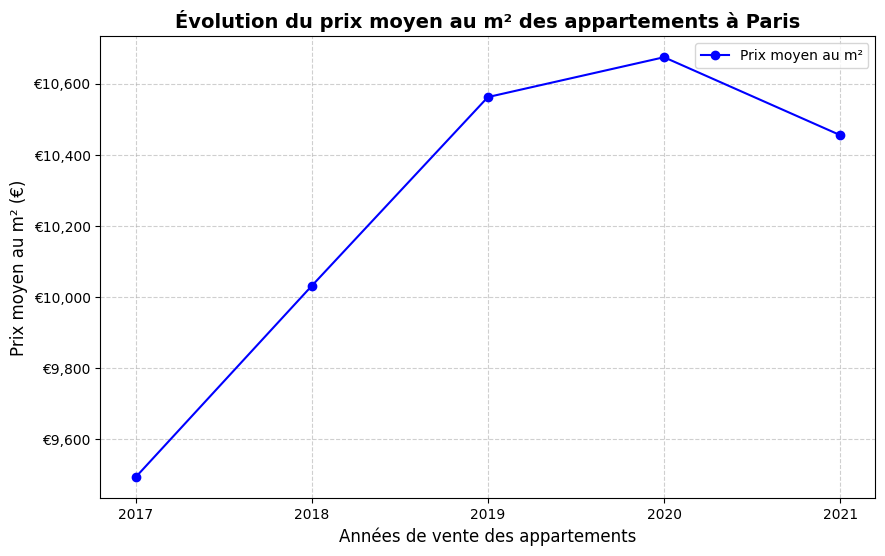

In [133]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 1. Ajouter la colonne prix au m²
df_historique_appartements["prix_m2"] = df_historique_appartements["valeur_fonciere"] / df_historique_appartements["surface_reelle"]

# 2. Recalculer les moyennes par année
df_appartements_par_annee = df_historique_appartements.groupby("annee").agg(
    prix_m2_moyen=("prix_m2", "mean"),
    surface_moyenne=("surface_reelle", "mean")
).reset_index()

# 3. Création du graphique
plt.figure(figsize=(10,6))  # Taille ajustée

# Tracer la courbe des prix moyens au m²
plt.plot(df_appartements_par_annee["annee"], df_appartements_par_annee["prix_m2_moyen"],
         marker='o', linestyle='-', color='b', label="Prix moyen au m²")

# Étiquettes des axes
plt.xlabel('Années de vente des appartements', fontsize=12)
plt.ylabel('Prix moyen au m² (€)', fontsize=12)

# Formatage des valeurs de l'axe Y en euros
formatter = ticker.FuncFormatter(lambda x, _: f'€{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

# Formatage des valeurs de l'axe X
plt.xticks(df_appartements_par_annee["annee"].astype(int))

# Grille et titre
plt.grid(True, linestyle='--', alpha=0.6)
plt.title('Évolution du prix moyen au m² des appartements à Paris', fontsize=14, fontweight='bold')

# Légende
plt.legend()

# Affichage
plt.show()


### 6. Différences de prix au metre carré entre les arrondissements

Maintenant nous allons chercher à afficher l'évolution des prix par arrondissement. Vérifions la liste des arrondissements que nous avons dans nos données. Normalement à Paris nous avons 20 codes postaux différents, 1 par arrondissement allant de 75001 à 75020.

In [134]:
#Liste des codes postaux dans nos données.
nombre_uniques_cp = df_historique["code_postal"].nunique()
print(f'le nombre de codes postaux dans les données est : {nombre_uniques_cp}')

le nombre de codes postaux dans les données est : 20


In [135]:
# Créer une copie indépendante du DataFrame pour éviter les warnings
df_historique_appartements = df_historique[df_historique['type_local'] == 'Appartement'].copy()

# Ajouter une colonne 'annee' en extrayant l'année
df_historique_appartements["annee"] = df_historique_appartements["date_mutation"].dt.year

# Ajouter une colonne 'arrondissement' en extrayant les 2 derniers chiffres du code postal
df_historique_appartements["arrondissement"] = df_historique_appartements["code_postal"].astype(str).str[-2:]

# Convertir en entier
df_historique_appartements["arrondissement"] = df_historique_appartements["arrondissement"].astype(int)

# Filtrer uniquement les arrondissements de Paris (1 à 20)
df_historique_appartements = df_historique_appartements[df_historique_appartements["arrondissement"].between(1, 20)]

# Calculer le prix au m²
df_historique_appartements["prix_m2"] = df_historique_appartements["valeur_fonciere"] / df_historique_appartements["surface_reelle"]

# Grouper par année et arrondissement, puis calculer la moyenne du prix au m²
df_prix_par_arrondissement = df_historique_appartements.groupby(["annee", "arrondissement"]).agg(
    prix_m2_moyen=("prix_m2", "mean")
).reset_index()

# Arrondir les valeurs pour un affichage plus propre
df_prix_par_arrondissement = df_prix_par_arrondissement.round(2)

# Afficher un aperçu des données
display(df_prix_par_arrondissement)


,annee,arrondissement,prix_m2_moyen
0,2017,1,"11,762.71"
1,2017,2,"10,920.13"
2,2017,3,"11,679.82"
3,2017,4,"12,407.23"
4,2017,5,"11,306.75"
...,...,...,...
95,2021,16,"10,790.31"
96,2021,17,"10,372.37"
97,2021,18,"9,665.64"
98,2021,19,"8,828.59"


Tracer une courbe représentative de l'évolution du prix au m² du 1er arrondissement dans le temps.

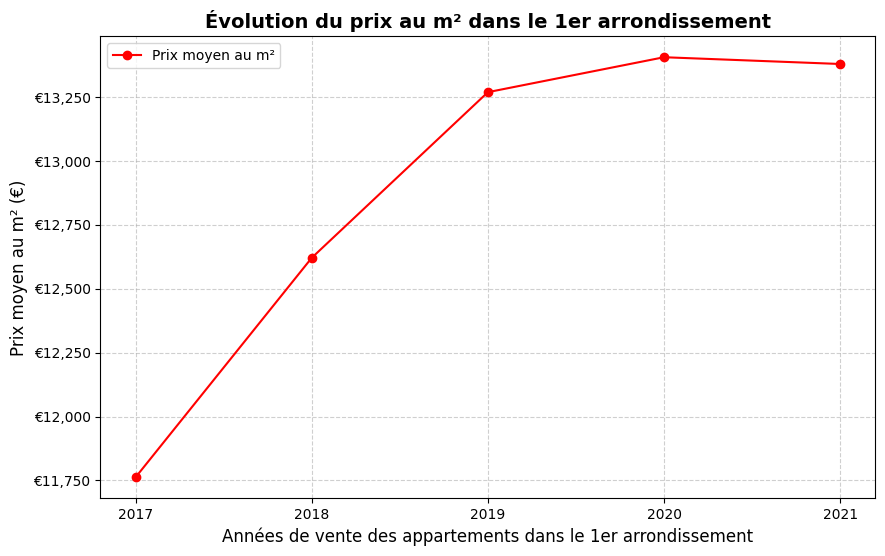

In [136]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Filtrer les données pour le 1er arrondissement
df_premier_arr = df_prix_par_arrondissement[df_prix_par_arrondissement["arrondissement"] == 1]

# Création du graphique
plt.figure(figsize=(10, 6))

# Tracer la courbe de l'évolution des prix au m²
plt.plot(df_premier_arr["annee"], df_premier_arr["prix_m2_moyen"], marker='o', linestyle='-', color='red', label="Prix moyen au m²")

# Étiquettes des axes
plt.xlabel("Années de vente des appartements dans le 1er arrondissement", fontsize=12)
plt.ylabel("Prix moyen au m² (€)", fontsize=12)

# Formatage de l'axe Y pour afficher les valeurs en euros
formatter = ticker.FuncFormatter(lambda x, _: f'€{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

# Ajout d'une grille, d'un titre, formatage de l'affichage des abscisses
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks([2017, 2018, 2019, 2020, 2021])
plt.title("Évolution du prix au m² dans le 1er arrondissement", fontsize=14, fontweight='bold')

# Ajouter une légende
plt.legend()

# Afficher le graphique
plt.show()


Nous allons ajouter à cette visualisation tous les autres arrondissement avec une couleur différente.

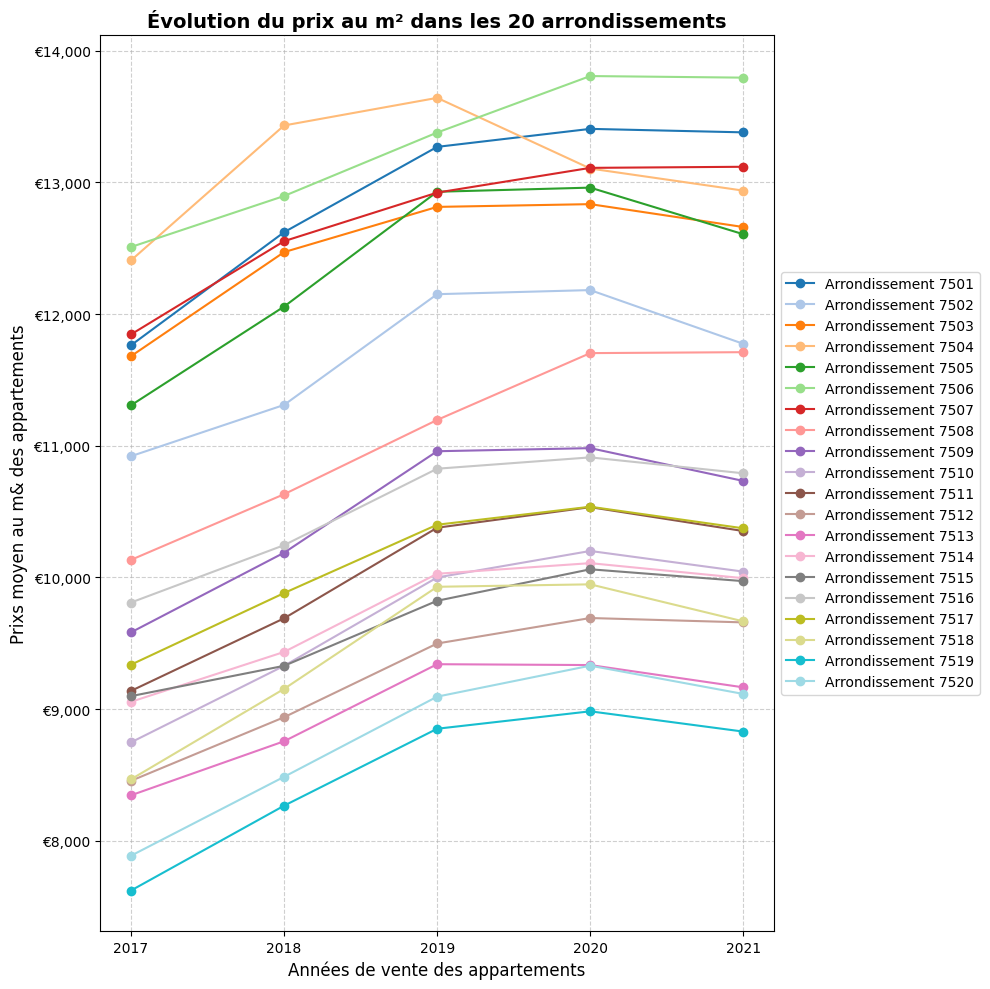

In [137]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# Liste des arrondissements
arrondissements = sorted(df_prix_par_arrondissement["arrondissement"].unique())

# Palette de couleurs
colors = sns.color_palette("tab20", len(arrondissements))

# Création du graphique principal
plt.figure(figsize=(10, 10))

# Tracer les courbes des prix moyens au m²
for i, arrondissement in enumerate(arrondissements):
    data = df_prix_par_arrondissement[df_prix_par_arrondissement["arrondissement"] == arrondissement]
    plt.plot(
        data["annee"],
        data["prix_m2_moyen"],
        marker='o',
        linestyle='-',
        color=colors[i],
        label=f"Arrondissement 75{arrondissement:02d}"
    )

# Titres et labels
plt.title("Évolution du prix au m² dans les 20 arrondissements", fontsize=14, fontweight='bold')
plt.xlabel("Années de vente des appartements", fontsize=12)
plt.ylabel("Prixs moyen au m& des appartements", fontsize=12)

# Axe Y en format euros
formatter = ticker.FuncFormatter(lambda x, _: f'€{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

# Axe X avec les années entières
plt.xticks([2017, 2018, 2019, 2020, 2021])

# Grille, légende et disposition
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))  # Légende à droite
plt.tight_layout()

# Affichage
plt.show()


Créeons une version plus clair

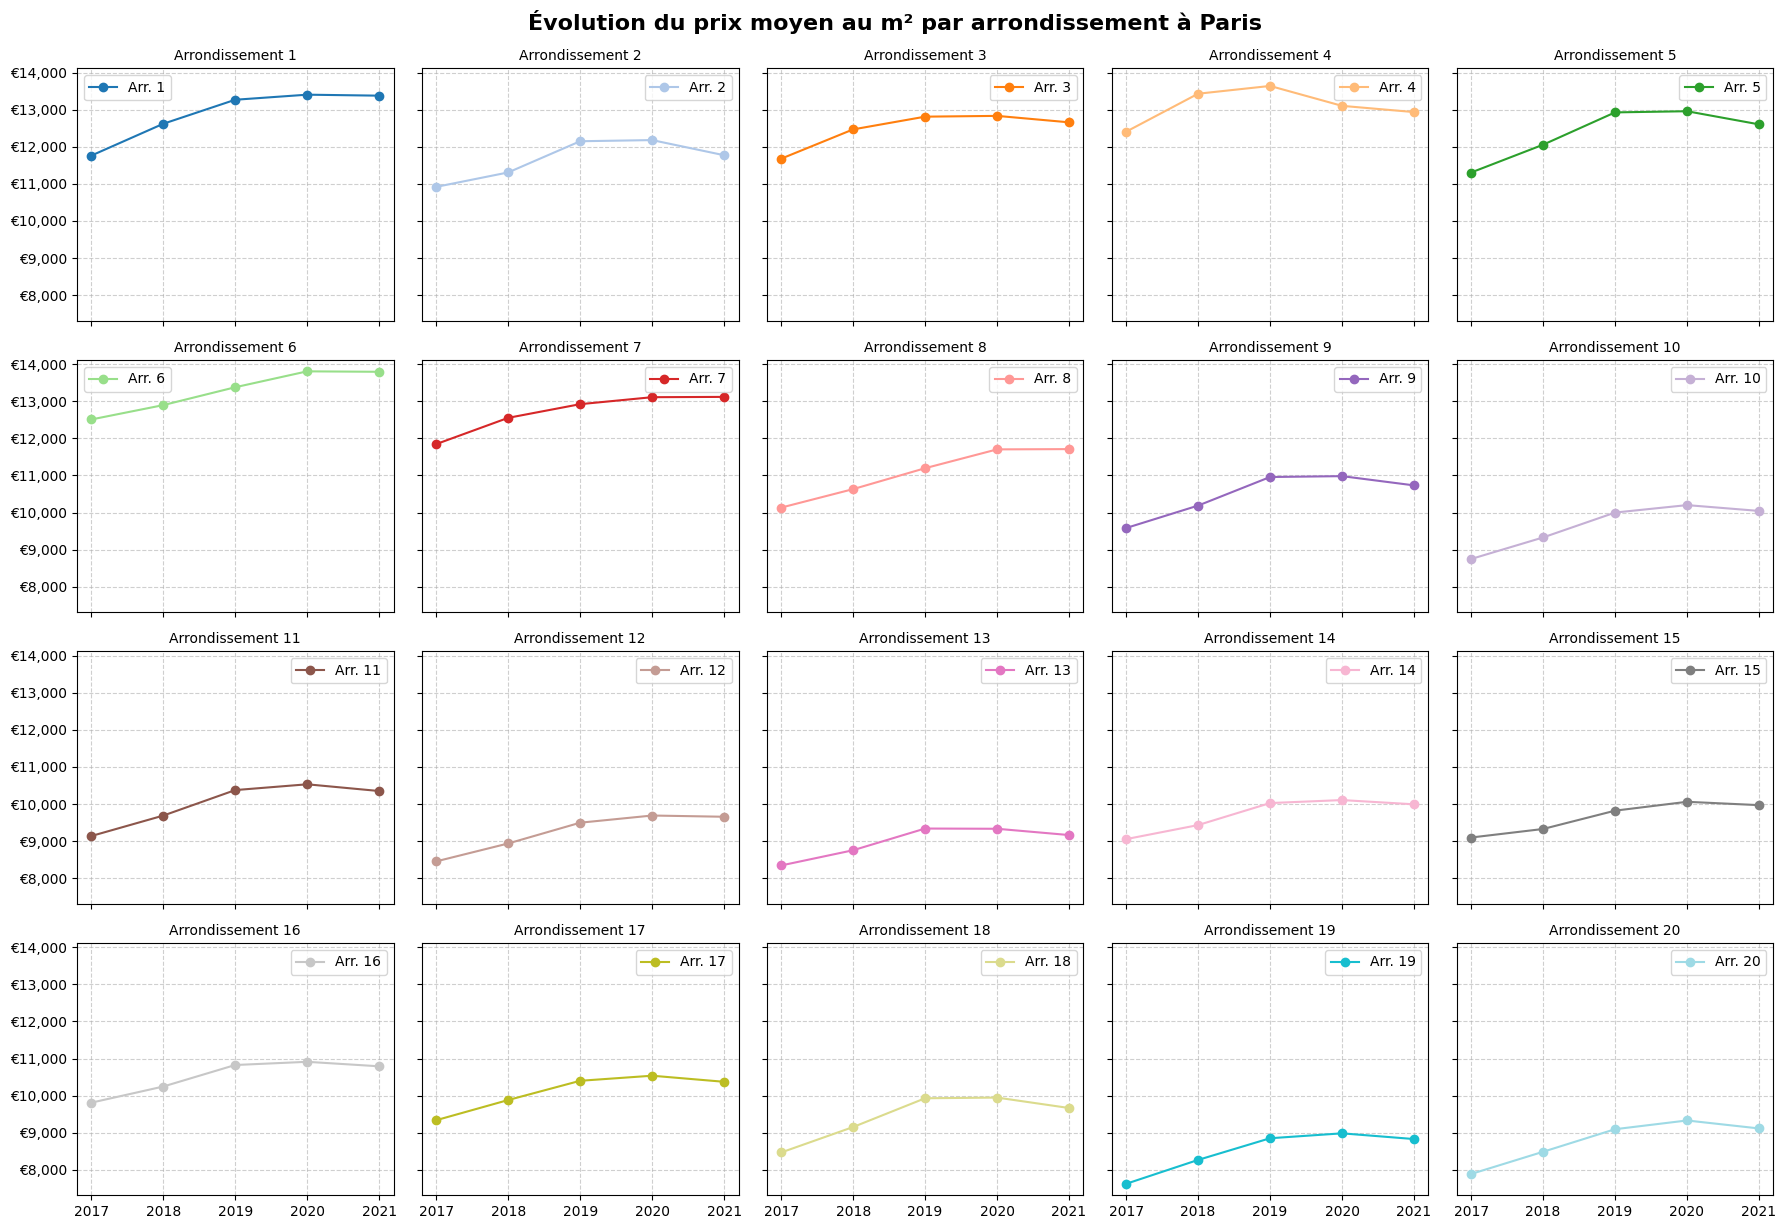

In [138]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# Liste unique des arrondissements présents dans les données
arrondissements = sorted(df_prix_par_arrondissement["arrondissement"].unique())

# Générer une palette de couleurs unique (20 couleurs pour 20 arrondissements)
colors = sns.color_palette("tab20", len(arrondissements))

# Création des sous-graphes (4 lignes, 5 colonnes pour les 20 arrondissements)
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(18, 12), sharex=True, sharey=True)

# Aplatir la grille d'axes pour itérer facilement dessus
axes = axes.flatten()

# Tracer une courbe pour chaque arrondissement avec une couleur unique
for i, arrondissement in enumerate(arrondissements):
    ax = axes[i]
    data = df_prix_par_arrondissement[df_prix_par_arrondissement["arrondissement"] == arrondissement]

    # Choisir une couleur unique pour cet arrondissement
    color = colors[i]

    # Tracer la courbe avec une couleur spécifique
    ax.plot(data["annee"], data["prix_m2_moyen"], marker='o', linestyle='-', color=color, label=f"Arr. {arrondissement}")

    # Formatage des axes
    ax.set_title(f"Arrondissement {arrondissement}", fontsize=10)
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'€{x:,.0f}'))

    # Ajouter une légende avec la couleur associée
    ax.legend()

# Ajuster la mise en page
plt.tight_layout()
plt.suptitle("Évolution du prix moyen au m² par arrondissement à Paris", fontsize=16, fontweight="bold", y=1.02)

# Afficher les graphiques
plt.show()


On observe que globalement :


1.    Avant 2020 : Montée globale des prix dans presque tous les arrondissements.
2.   Après 2020 : Certains arrondissements montrent des baisses, notamment dans le centre.




### 7. Prix au metre carré par transaction dans un arrondissement

In [139]:
#Vérifions le nombre de transaction dans le 6ème car le prix semble élevé
# Filtrer les transactions pour le 6ème arrondissement (code postal 75006)
df_6eme = df_historique_appartements[df_historique_appartements["arrondissement"] == 6]

# Compter le nombre total de transactions
nombre_transactions_6eme = df_6eme.shape[0]

print(f"Nombre total de transactions dans le 6ème arrondissement : {nombre_transactions_6eme}")


Nombre total de transactions dans le 6ème arrondissement : 709


On constate
1. Un nombre relativement élevé

709 transactions sur la période 2017-2021, cela représente en moyenne environ 140 ventes par an, ce qui est plutôt correct pour un arrondissement parisien.
On peut considérer cette valeur comme représentative du marché.

2. Mais il faut vérifier s'il y a des ventes exceptionnelles (extrêmes)

Quelques ventes très chères (appartements de luxe, hôtels particuliers) peuvent fausser la moyenne.

Affichons l'historique des transactions pour visualiser la dispersion des données :

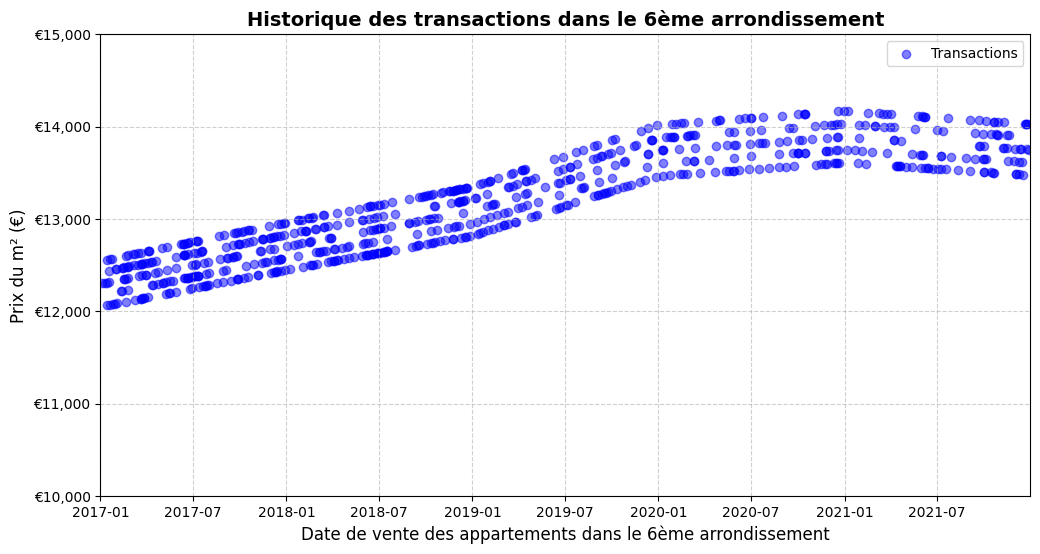

In [140]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd

# Filtrer les transactions pour le 6ème arrondissement (code postal 75006)
df_6eme = df_historique_appartements[df_historique_appartements["arrondissement"] == 6]

# Trier les données par date de mutation
df_6eme = df_6eme.sort_values("date_mutation")

# Créer la figure du graphique
plt.figure(figsize=(12, 6))

# Scatter plot des transactions (date de vente vs prix au m²)
plt.scatter(df_6eme["date_mutation"], df_6eme["prix_m2"], alpha=0.5, color='blue', label="Transactions")

# Labels des axes
plt.xlabel('Date de vente des appartements dans le 6ème arrondissement', fontsize=12)
plt.ylabel('Prix du m² (€)', fontsize=12)

# Formatage de l'axe Y en euros
formatter = ticker.FuncFormatter(lambda x, _: f'€{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

# Définir les limites des axes pour zoomer
plt.xlim(pd.to_datetime('2017-01-01'), pd.to_datetime('2021-12-31'))  # Ajuster la plage de dates
plt.ylim(10000, 15000)  # Ajuster la plage des prix au m² (ex. de 10,000 à 15,000 €)

# Ajouter une grille et un titre
plt.grid(True, linestyle='--', alpha=0.6)
plt.title('Historique des transactions dans le 6ème arrondissement', fontsize=14, fontweight='bold')

# Ajouter une légende
plt.legend()

# Afficher le graphique
plt.show()


On observe qu'il y a une tendance à la hausse du prix au m², que depuis 2020 il y a une stabilisation du prix

Pour nous rassurer sur la relation entre les données nous allons utiliser un test statistique de corrélation.

### 8. Vérification de la relation entre le prix au m² et la date dans le 6ème arrondissement par le calcul du coefficient de corrélation de Pearson

Pour cette distribution nous allons calculer le coefficient de corrélation de Pearson. La relation entre le prix au metre carré et la date n'est pas forcément linéaire mais elle s'en rapproche suffisamment pour que cette analyse soit pertinente (voir l'évolution du prix au metre carré globale montrée plus haut, on a presque une droite sauf entre 2020 et 2021). Ce qui nous interesse c'est de prouver que le temps a une influence sur le prix.

In [141]:
#On calcule la corrélation de Spearman
from scipy.stats import pearsonr

# Calcul de la corrélation entre la date et le prix au m²
corr, p_value = pearsonr(df_6eme["date_mutation"].astype("int64"), df_6eme["prix_m2"])

print(f"Coefficient de corrélation de Pearson : {corr:.4f}")
print(f"Valeur p : {p_value:.4f}")


Coefficient de corrélation de Pearson : 0.9038
Valeur p : 0.0000


Le coefficient de corrélation est de 0.9038 avec une p-value de 0 donc nous pouvons confirmer la corrélation.

### 9. Vérification de la relation entre la valeur fonciere et la surface

Traçons un nuage de point représentant la relation entre la valeur foncière et la surface réelle.

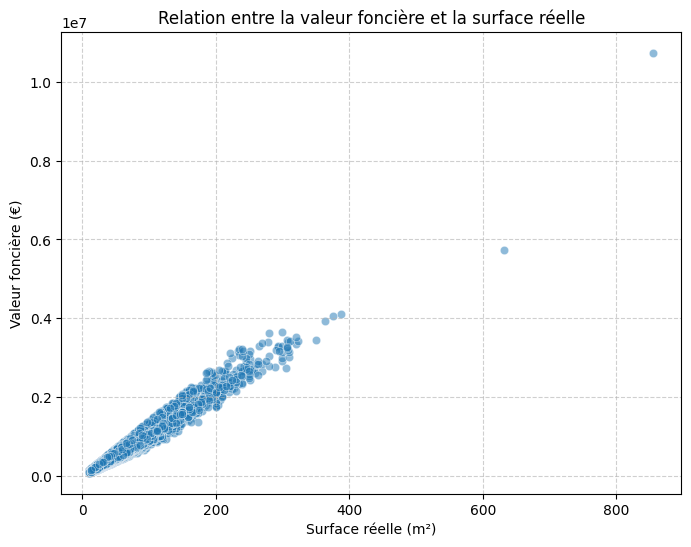

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))

# Scatter plot
sns.scatterplot(x=df_historique_appartements["surface_reelle"], y=df_historique_appartements["valeur_fonciere"], alpha=0.5)

# Labels et titre
plt.xlabel("Surface réelle (m²)")
plt.ylabel("Valeur foncière (€)")
plt.title("Relation entre la valeur foncière et la surface réelle")

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [143]:
from scipy.stats import pearsonr

# Calcul de la corrélation entre la valeur foncière et la surface
corr, p_value = pearsonr(df_historique_appartements["surface_reelle"], df_historique_appartements["valeur_fonciere"])

print(f"Coefficient de corrélation de Pearson : {corr:.4f}")
print(f"Valeur p : {p_value:.4f}")


Coefficient de corrélation de Pearson : 0.9801
Valeur p : 0.0000


Le coefficient de corrélation est de 0.9801 avec une pvalue de 0. La relation est donc confirmée.

Regardons maintenant si le type de bien à une influence sur le prix au metre carré également.

<ipython-input-144-7ff10fa76afb>:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Type de bien", loc="upper left", fontsize=10, frameon=False)  # Ajouter la légende si nécessaire


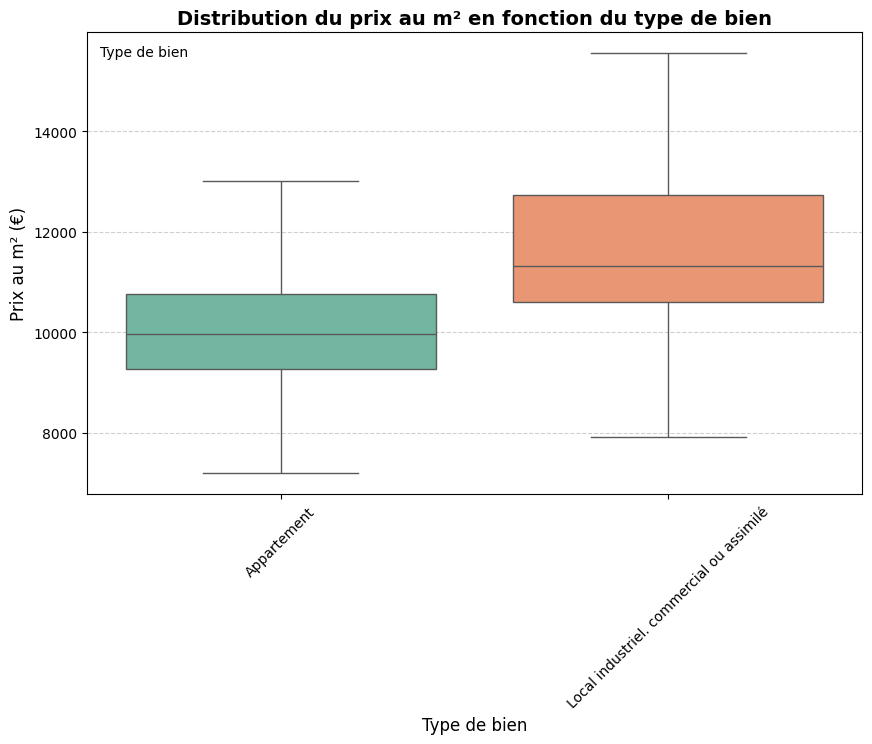

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))

# Boxplot des prix au m² par type de bien
sns.boxplot(x="type_local", y="prix_m2", data=df_historique, hue="type_local", palette="Set2", showfliers=False)

# Labels et titre
plt.xlabel("Type de bien", fontsize=12)
plt.ylabel("Prix au m² (€)", fontsize=12)
plt.title("Distribution du prix au m² en fonction du type de bien", fontsize=14, fontweight='bold')

plt.xticks(rotation=45)  # Rotation pour une meilleure lisibilité des labels
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.legend(title="Type de bien", loc="upper left", fontsize=10, frameon=False)  # Ajouter la légende si nécessaire
plt.show()


Si les médianes des catégories sont très différentes, cela suggère que le type de bien influence bien le prix au m².

Pour savoir si les différences observées sont statistiquement significatives, on peut utiliser :

ANOVA (Analyse de Variance) si les distributions sont normales.
Kruskal-Wallis si les distributions ne sont pas normales.

In [145]:
# Effectuons le test ANOVA
from scipy.stats import f_oneway

# Séparer les groupes de prix au m² par type de bien
groupes = [df_historique[df_historique["type_local"] == cat]["prix_m2"].dropna() for cat in df_historique["type_local"].unique()]

# Test ANOVA
stat, p_value = f_oneway(*groupes)

print(f"Statistique F : {stat:.4f}")
print(f"Valeur p : {p_value:.4f}")


Statistique F : 1976.0079
Valeur p : 0.0000


La statistique F est de 1976.0079 avec une pvalue de 0.

On peut conclure que les différences entre les groupes (types de biens) sont statistiquement significatives. Cela signifie que le type de bien a un effet sur le prix au m².

In [146]:
# Effectuons le test Kruskal-Wallis
from scipy.stats import kruskal

# Test Kruskal-Wallis
stat, p_value = kruskal(*groupes)

print(f"Statistique H : {stat:.4f}")
print(f"Valeur p : {p_value:.4f}")


Statistique H : 1645.7349
Valeur p : 0.0000


La statistique H est de 1645.7349 avec une pvalue de 0.

Cela confirme qu'il existe une différence significative entre les groupes, même si les distributions des données ne sont pas normales.


### 10. Analyse des locaux industriels, commerciaux et assimilés

In [147]:
# Filtrer le DataFrame pour ne conserver que les locaux commerciaux
df_historique_locaux_commerciaux = df_historique[df_historique["type_local"] == "Local industriel. commercial ou assimilé"]

# Vérifier les premières lignes du dataset filtré
display(df_historique_locaux_commerciaux.head())


,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,code_type_local,type_local,surface_reelle,prix_m2
18,2017-02-01,"3,113,277.30",65,RUE DE TURBIGO,75003,Paris 3e Arrondissement,4,Local industriel. commercial ou assimilé,250,"12,453.11"
29,2017-02-17,"1,164,375.26",17,RUE DU PONT AUX CHOUX,75003,Paris 3e Arrondissement,4,Local industriel. commercial ou assimilé,95,"12,256.58"
34,2017-02-20,"380,252.19",10,RUE CAFFARELLI,75003,Paris 3e Arrondissement,4,Local industriel. commercial ou assimilé,31,"12,266.20"
91,2017-03-09,"362,384.17",33,RUE DE RICHELIEU,75001,Paris 1er Arrondissement,4,Local industriel. commercial ou assimilé,29,"12,496.01"
109,2017-03-29,"315,907.23",130,RUE VIEILLE DU TEMPLE,75003,Paris 3e Arrondissement,4,Local industriel. commercial ou assimilé,25,"12,636.29"


In [148]:
# Créer une copie du DataFrame filtré avant d'ajouter de nouvelles colonnes
df_historique_locaux_commerciaux = df_historique[df_historique["type_local"] == "Local industriel. commercial ou assimilé"].copy()

# Ajouter la colonne année
df_historique_locaux_commerciaux["annee"] = df_historique_locaux_commerciaux["date_mutation"].dt.year

# Calculer le prix au m²
df_historique_locaux_commerciaux["prix_m2"] = df_historique_locaux_commerciaux["valeur_fonciere"] / df_historique_locaux_commerciaux["surface_reelle"]

# Regrouper par année et calculer les moyennes du prix au m² et de la surface
df_locaux_commerciaux_par_annee = df_historique_locaux_commerciaux.groupby("annee").agg(
    prix_moyen_m2=("prix_m2", "mean"),  # Moyenne des prix au m²
    surface_moyenne=("surface_reelle", "mean")  # Moyenne des surfaces
).reset_index()

# Afficher les premières lignes
display(df_locaux_commerciaux_par_annee)


,annee,prix_moyen_m2,surface_moyenne
0,2017,"10,949.91",89.99
1,2018,"11,569.50",88.10
2,2019,"11,960.13",82.83
3,2020,"11,966.47",85.63
4,2021,"12,006.49",92.83


In [149]:
# Vérifier les valeurs uniques dans la colonne "type_local"
print(f'la colonne "type_local" contient les informations : {df_historique["type_local"].unique()}')


la colonne "type_local" contient les informations : ['Appartement' 'Local industriel. commercial ou assimilé']


Traçons une représentation graphique de l'évolution des prix au m² par type de local.

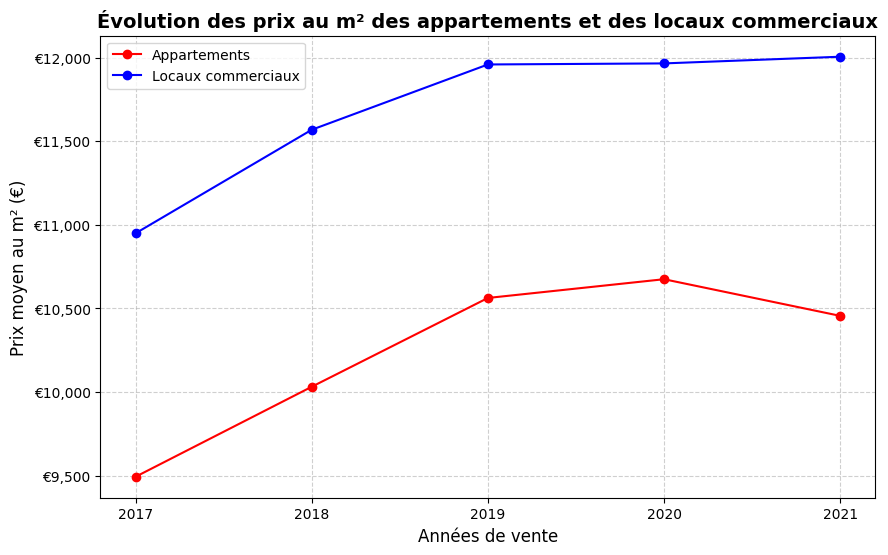

In [150]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Créer le graphique
plt.figure(figsize=(10, 6))

# Tracer les courbes des prix moyens au m²
plt.plot(df_appartements_par_annee["annee"], df_appartements_par_annee["prix_m2_moyen"],
         marker='o', linestyle='-', color='red', label='Appartements')

# Corrected column name here
plt.plot(df_locaux_commerciaux_par_annee["annee"], df_locaux_commerciaux_par_annee["prix_moyen_m2"],
         marker='o', linestyle='-', color='blue', label='Locaux commerciaux')

# Étiquettes des axes
plt.xlabel("Années de vente", fontsize=12)
plt.ylabel("Prix moyen au m² (€)", fontsize=12)

# Titre
plt.title("Évolution des prix au m² des appartements et des locaux commerciaux", fontsize=14, fontweight='bold')

# Formatage de l’axe Y en euros
formatter = ticker.FuncFormatter(lambda x, _: f'€{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

# Axe X avec années entières
plt.xticks([2017, 2018, 2019, 2020, 2021])

# Grille et légende
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Afficher
plt.show()

Le prix au mètre carré des locaux commerciaux est **nettement supérieur** à celui des appartements.

De plus, la tendance est à la **croissance pour les locaux commerciaux**, tandis que les prix des appartements montrent une stagnation, voire une **baisse**.

Après ces analyses, nous pouvons conclure que les dimensions à utiliser pour prédire le prix au m² sont :
- la surface du bien immobilier,
- la date considérée,
- la localisation (code_postal),
- le type de bien.

In [151]:
df_historique = df_historique.drop(['adresse_numero', 'adresse_nom_voie', 'nom_commune', 'code_type_local'], axis=1)
display(df_historique.head())

,date_mutation,valeur_fonciere,code_postal,type_local,surface_reelle,prix_m2
0,2017-01-03,"550,559.68",75003,Appartement,50,"11,011.19"
1,2017-01-12,"1,576,492.46",75008,Appartement,163,"9,671.73"
2,2017-01-10,"657,757.36",75008,Appartement,66,"9,966.02"
3,2017-01-10,"250,086.82",75003,Appartement,22,"11,367.58"
4,2017-01-13,"176,266.71",75001,Appartement,15,"11,751.11"


# Milestone 2 - Entraînement de l'algorithme

Dans cette section nous allons maintenant entraîner un algorithme à prédire la valeur fonciere d'un bien immobilier. Pour cela nous allons utiliser l'algorithme de régression linéaire.

On commence par préparer nos données en transformant les colonnes catégoriques du code postal et du type de local grâce au one hot encoder (sklearn) / get_dummies (pandas)

In [152]:
from sklearn.preprocessing import OneHotEncoder

# Création de l'encodeur
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Encoder code_postal et type_local
ohe_result = ohe.fit_transform(df_historique[['code_postal', 'type_local']])

# Créer les colonnes encodées
df_ohe = pd.DataFrame(ohe_result, columns=ohe.get_feature_names_out(['code_postal', 'type_local']))

# Concaténer les colonnes encodées avec le df_historique
df_historique_encoded = pd.concat([df_historique.reset_index(drop=True), df_ohe], axis=1)

# Supprimer les colonnes d'origine encodées (optionnel)
df_historique_encoded.drop(['code_postal', 'type_local'], axis=1, inplace=True)

df_historique_encoded.head()


,date_mutation,valeur_fonciere,surface_reelle,prix_m2,code_postal_75001,code_postal_75002,code_postal_75003,code_postal_75004,code_postal_75005,code_postal_75006,...,code_postal_75013,code_postal_75014,code_postal_75015,code_postal_75016,code_postal_75017,code_postal_75018,code_postal_75019,code_postal_75020,type_local_Appartement,type_local_Local industriel. commercial ou assimilé
0,2017-01-03,"550,559.68",50,"11,011.19",0.00,0.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
1,2017-01-12,"1,576,492.46",163,"9,671.73",0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
2,2017-01-10,"657,757.36",66,"9,966.02",0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
3,2017-01-10,"250,086.82",22,"11,367.58",0.00,0.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
4,2017-01-13,"176,266.71",15,"11,751.11",1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00


In [153]:
#Conversion des dates en nombres
df_historique_encoded['date_mutation'] = pd.to_datetime(df_historique_encoded['date_mutation']).dt.year

On utilise le train_test_split pour prélever un tiers de nos données (33%) et les garder de côté. Nous allons entraîner notre algorithme sur le reste des données et puis mesurer notre erreur moyenne en pourcentage de la valeur foncière

In [154]:
# Supprimer la colonne 'prix_m2'
df_historique_encoded = df_historique_encoded.drop('prix_m2', axis=1)

# La valeur y à trouver est la valeur foncière
# X = toutes les colonnes sauf 'valeur_fonciere'
X = df_historique_encoded.drop('valeur_fonciere', axis=1)

# y = valeur à prédire
y = df_historique_encoded['valeur_fonciere']


In [155]:
from sklearn.model_selection import train_test_split

# On sépare les données en 33% pour le test et 67% pour l'entraînement
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


# Afficher la forme des données
print(X_train.shape, X_test.shape)


(17551, 24) (8645, 24)


In [156]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Création du modèle
model = LinearRegression()

# Entraînement
model.fit(X_train, y_train)

# Prédiction
y_pred = model.predict(X_test)

# Évaluation
mae = mean_absolute_error(y_test, y_pred)
mae_percent = (mae / y_test.mean()) * 100

print(f"Erreur absolue moyenne (MAE) : {mae:,.2f} €")
print(f"Erreur moyenne en pourcentage : {mae_percent:.2f}%")

Erreur absolue moyenne (MAE) : 34,424.20 €
Erreur moyenne en pourcentage : 7.03%


Traçons ces droites de régressions

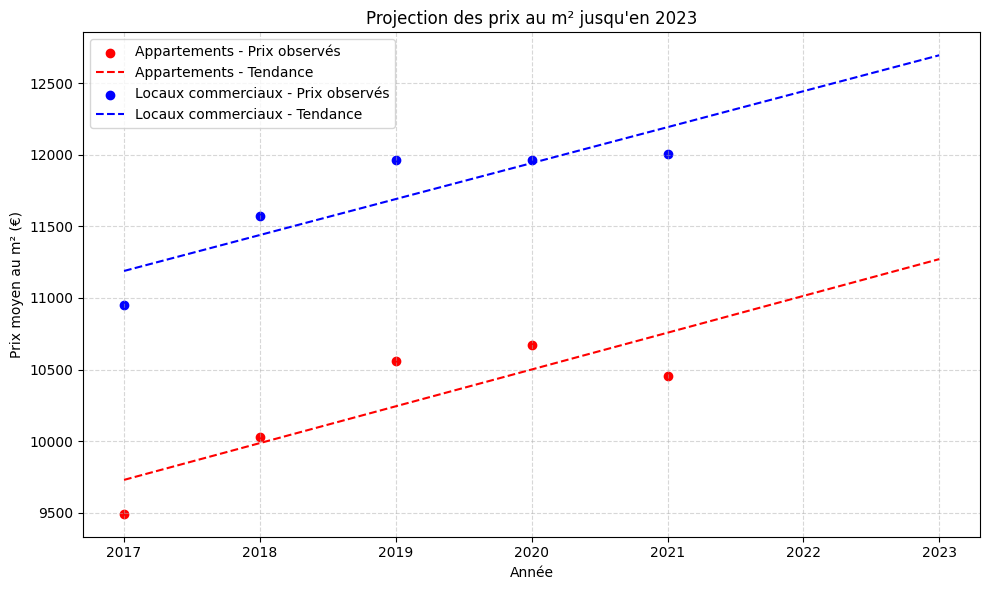

In [180]:
import matplotlib.pyplot as plt
import numpy as np

# Régression linéaire sur les appartements
coeffs_appart = np.polyfit(df_appartements_par_annee["annee"], df_appartements_par_annee["prix_m2_moyen"], deg=1)
reg_appart = np.poly1d(coeffs_appart)

# Régression linéaire sur les locaux commerciaux
coeffs_locaux = np.polyfit(df_locaux_commerciaux_par_annee["annee"], df_locaux_commerciaux_par_annee["prix_moyen_m2"], deg=1)
reg_locaux = np.poly1d(coeffs_locaux)

# Étendre la plage d'années de 2017 à 2023
annees_etendues = np.arange(2017, 2024)  # incluant 2023
tendance_appart = reg_appart(annees_etendues)
tendance_locaux = reg_locaux(annees_etendues)

# Tracer les points et les droites
plt.figure(figsize=(10, 6))
plt.scatter(df_appartements_par_annee["annee"], df_appartements_par_annee["prix_m2_moyen"], color='red', label='Appartements - Prix observés')
plt.plot(annees_etendues, tendance_appart, color='red', linestyle='--', label='Appartements - Tendance')

plt.scatter(df_locaux_commerciaux_par_annee["annee"], df_locaux_commerciaux_par_annee["prix_moyen_m2"], color='blue', label='Locaux commerciaux - Prix observés')
plt.plot(annees_etendues, tendance_locaux, color='blue', linestyle='--', label='Locaux commerciaux - Tendance')

# Mise en forme avec axe X figé
plt.title("Projection des prix au m² jusqu'en 2023")
plt.xlabel("Année")
plt.ylabel("Prix moyen au m² (€)")
plt.xticks(annees_etendues)  # Forcer les ticks de 2017 à 2023
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

Notre algorithme fait donc 7.03 % d'erreur en moyenne sur la prédiction de la valeur foncière.

Mes conclusions sur ce résultat et comment j'aurais pu aller plus loin :
- Utiliser Ridge ou Lasso Regression pour améliorer la performance du modèle en régularisant
- Utiliser d'autres test comme Random Forests ou Gradient Boosting pour gérer les non-linéarités dans les données

# Milestone 3 - Prédiction définitive pour le client

Nous avons récupéré le fichier avec le portefeuille des actifs de la société. Nous allons l'importer puis effectuer la prédiction et statuer sur la branche qui, selon notre prédiction, aura le plus de valeur à la date demandée c'est à dire au 31 décembre 2022.<br>
Petite précision, nous souhaitons continuer à utiliser la surface réelle pour faire les calculs et pas la surface carrez.

In [157]:
#On importe les données dans un dataframe
df_portefeuille = pd.read_excel('/content/portefeuille_actifs+(3).xlsx')
display(df_portefeuille.head())

,adresse_numero,adresse_nom_voie,code_postal,code_commune,nom_commune,surface_carrez,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,longitude,latitude
0,127,RUE SAINT-DENIS,75001,75101,Paris 1er Arrondissement,16.41,2,Appartement,25,1,2.35,48.86
1,62,RUE NOTRE-DAME DE NAZARETH,75003,75103,Paris 3e Arrondissement,20.47,2,Appartement,22,1,2.36,48.87
2,62,RUE DE TURENNE,75003,75103,Paris 3e Arrondissement,64.48,2,Appartement,65,3,2.36,48.86
3,32,AV GEORGE V,75008,75108,Paris 8e Arrondissement,63.29,2,Appartement,74,2,2.30,48.87
4,152,BD HAUSSMANN,75008,75108,Paris 8e Arrondissement,20.58,2,Appartement,22,1,2.31,48.88


Nous avons la liste des biens immobiliers de l'entreprise. Pour effectuer une prédiction, nous devons mettre ce fichier au même format que le dataframe que nous avons utilisé lors de l'entraînement de l'algorithme.

In [158]:
print(df_portefeuille.dtypes)

adresse_numero                 int64
adresse_nom_voie              object
code_postal                    int64
code_commune                   int64
nom_commune                   object
surface_carrez               float64
code_type_local                int64
type_local                    object
surface_reelle_bati            int64
nombre_pieces_principales      int64
longitude                    float64
latitude                     float64
dtype: object


In [159]:
# Renommer la colonne surface_reelle_bati en surface_reelle
df_portefeuille.rename(columns={'surface_reelle_bati': 'surface_reelle'}, inplace=True)

In [160]:
#suppression des colonnes inutiles
df_portefeuille = df_portefeuille.drop(['adresse_numero', 'adresse_nom_voie', 'nom_commune'], axis=1)


In [161]:
#On importe la librairie datetime pour pouvoir créer une colonne timestamp avec la date du 31 décembre 2022 pour la prédiction
import datetime as dt
df_portefeuille['date_mutation'] = dt.datetime(2022, 12, 31)

In [162]:
# Passer en str
df_portefeuille['code_postal'] = df_portefeuille['code_postal'].astype(str)
df_portefeuille['type_local'] = df_portefeuille['type_local'].astype(str)


In [163]:
# Appliquer le OneHotEncoder déjà entraîné
ohe_result_portefeuille = ohe.transform(df_portefeuille[['code_postal', 'type_local']])

# Créer un DataFrame avec les bons noms de colonnes
df_ohe_portefeuille = pd.DataFrame(ohe_result_portefeuille, columns=ohe.get_feature_names_out(['code_postal', 'type_local']))

# Fusionner les colonnes encodées avec le portefeuille
df_portefeuille_encoded = pd.concat([df_portefeuille.reset_index(drop=True), df_ohe_portefeuille], axis=1)

# Supprimer les colonnes originales encodées
df_portefeuille_encoded.drop(['code_postal', 'type_local'], axis=1, inplace=True)

#Transformer date_mutation en année (comme dans l'entraînement)
df_portefeuille_encoded['date_mutation'] = pd.to_datetime(df_portefeuille_encoded['date_mutation']).dt.year


Notre dataframe est prêt à être utilisé par notre algorithme de prédiction.

In [164]:
# Reprendre les noms de colonnes utilisées pour entraîner le modèle
X_portefeuille = pd.concat([df_portefeuille.reset_index(drop=True), df_ohe_portefeuille], axis=1)
X_portefeuille.drop(['code_postal', 'type_local'], axis=1, inplace=True)
X_portefeuille['date_mutation'] = pd.to_datetime(X_portefeuille['date_mutation']).dt.year

# On conserve seulement les colonnes présentes à la fois dans X et dans X_portefeuille
X_portefeuille = X_portefeuille[[col for col in X.columns if col in X_portefeuille.columns]]

y_pred_portefeuille = model.predict(X_portefeuille)


Maintenant nous allons comparer la valorisation prédite pour les deux segments.

In [165]:
# Ajouter la prédiction au portefeuille d'origine
df_resultat = df_portefeuille.copy()
df_resultat["valeur_fonciere_predite"] = y_pred_portefeuille


In [166]:
# Supprimer les prédictions négatives
df_resultat = df_resultat[df_resultat["valeur_fonciere_predite"] > 0]


In [167]:
# Séparer les segments
val_particuliers = df_resultat[df_resultat["type_local"] == "Appartement"]["valeur_fonciere_predite"].sum() / 1_000_000
val_corporate = df_resultat[df_resultat["type_local"] == "Local industriel. commercial ou assimilé"]["valeur_fonciere_predite"].sum() / 1_000_000

# Affichage
print(f"Segment PARTICULIER : {val_particuliers:.2f} M€")
print(f"Segment CORPORATE : {val_corporate:.2f} M€")


Segment PARTICULIER : 70.07 M€
Segment CORPORATE : 97.25 M€


Effectuons une représentation graphique de ces résultats.

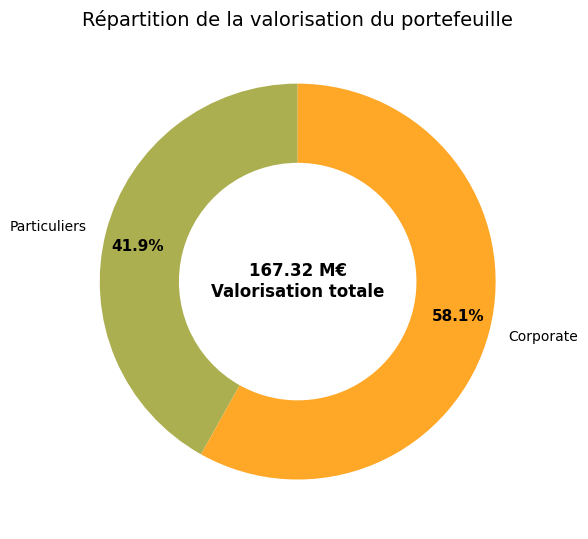

In [178]:
# Valeurs de valorisation
valeur_totale_particuliers = val_particuliers
valeur_totale_corporate = val_corporate
total = valeur_totale_particuliers + valeur_totale_corporate

# Labels et couleurs
labels = ['Particuliers', 'Corporate']
values = [valeur_totale_particuliers, valeur_totale_corporate]
colors = ['#ACAF50', '#FFA726']  # vert - orange

# Création du donut chart
fig, ax = plt.subplots(figsize=(6, 6))
wedges, texts = ax.pie(
    values,
    labels=labels,
    startangle=90,
    colors=colors,
    wedgeprops={'width': 0.4}
)

# Ajout des pourcentages manuellement
for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1) / 2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    ha = 'right' if x < 0 else 'left'
    ax.text(x*0.7, y*0.7,
            f"{values[i]/total*100:.1f}%",
            ha=ha, va='center',
            fontsize=11, fontweight='bold', color='black')

# Texte central
ax.text(0, 0, f'{total:.2f} M€\nValorisation totale',
        ha='center', va='center',
        fontsize=12, weight='bold')

# Titre
plt.title("Répartition de la valorisation du portefeuille", fontsize=14)
plt.tight_layout()
plt.show()


🔎 Le segment corporate apparaît comme le plus valorisé, avec une estimation globale supérieure à celle du segment des particuliers. Cela peut s’expliquer par la présence de biens de grande valeur ou à fort potentiel dans ce portefeuille.

📊 Les valeurs projetées reposent sur un modèle de prédiction entraîné sur des données historiques, avec une approche de régression linéaire. Ce choix méthodologique permet une lecture claire des tendances, mais ne reflète pas nécessairement les inflexions récentes du marché, comme le ralentissement observé sur le segment résidentiel en 2021.

⚠️ Ces prédictions doivent donc être interprétées avec précaution : la régression linéaire prolonge mécaniquement la tendance passée, sans intégrer les fluctuations conjoncturelles (telles que le contexte post-COVID, les taux d’intérêt ou la demande future).

🔧 À l’avenir, pour affiner ces estimations, il serait pertinent d’envisager des modèles plus souples, comme une régression polynomiale ou une modélisation par ruptures de tendance, capables de mieux capturer les retournements du marché.

# Milestone 4 - Classification des données issues du jeu de test

Dans cette partie nous allons labelliser automatiquement les biens immobiliers comme étant :
- soit des Appartements
- soit des Local industriel. commercial ou assimilé
Pour cela nous allons utiliser l'algorithme du KMeans sur le jeu de données partagé par l'entreprise.

Pour que l'algorithme fonctionne, il faut que nous préparions les données en supprimant les dimensions inutiles et en nous concentrant sur le facteur discriminant entre les appartements et les locaux commerciaux : la différence dans le prix au mètre carré tel que nous l'avons vu avant.

In [170]:
#On importe les données dans un dataframe
df_echantillon = pd.read_excel('/content/echantillon_a_classer2.xlsx')
display(df_echantillon.head())

,valeur_fonciere,code_postal,nom_commune,surface_reelle
0,"868,687.08",75019,Paris 19e Arrondissement,88
1,"452,050.76",75019,Paris 19e Arrondissement,45
2,"193,088.65",75019,Paris 19e Arrondissement,21
3,"303,012.55",75019,Paris 19e Arrondissement,32
4,"149,272.20",75019,Paris 19e Arrondissement,20


On applique les transformations nécessaires. Tout d'abord nous allons calculer le prix au mètre carré en divisant la valeur foncière par la surface. Ensuite nous allons retirer ces colonnes car nous avons déjà l'information qu'elles contiennent dans la dimension prix au mètre carré désormais.

Enfin toutes nos données sont de l'année 2021. Nous allons retirer cette dimension qui ne devrait pas être discriminante dans le regroupement des données.

In [171]:
# 1. Calculer le prix au m²
df_echantillon["prix_m2"] = df_echantillon['valeur_fonciere'] / df_echantillon["surface_reelle"]

# 2. Supprimer les colonnes redondantes
df_echantillon = df_echantillon.drop(columns=["valeur_fonciere", "surface_reelle"])

display(df_echantillon.head())

,code_postal,nom_commune,prix_m2
0,75019,Paris 19e Arrondissement,"9,871.44"
1,75019,Paris 19e Arrondissement,"10,045.57"
2,75019,Paris 19e Arrondissement,"9,194.70"
3,75019,Paris 19e Arrondissement,"9,469.14"
4,75019,Paris 19e Arrondissement,"7,463.61"


Nous observons dans les données que nous avons des valeurs différentes de prix au mètre carré pour un même arrondissement (ici le 19ème arrondissement). Il se peut fort que cela soit notre dimension à utiliser pour attribuer les prix au mètre carré les plus élévé dans un département aux locaux commerciaux, et les prix les plus bas aux appartements.

Pour effectuer cette opération, nous allons utiliser l'algorithme du Kmeans qui va rechercher 2 centroïdes à travers les données.

In [172]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 1. Encodage du code postal en One-Hot Encoding
df_echantillon_encoded = pd.get_dummies(df_echantillon, columns=["code_postal"], drop_first=True)

# 2. Sélection des variables pour le clustering
features = ["prix_m2"] + [col for col in df_echantillon_encoded.columns if col.startswith("code_postal_")]

# 3. Normalisation des données
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_echantillon_encoded[features])

# 4. Appliquer le clustering KMeans
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
df_echantillon_encoded["cluster_kmeans"] = kmeans.fit_predict(df_scaled)

# 5. Afficher les clusters
print("Centres des clusters :", kmeans.cluster_centers_)

Centres des clusters : [[-0.98795737]
 [ 0.98795737]]


In [173]:
# On vérifie les données de la prédiction
display(df_echantillon_encoded[["prix_m2", "cluster_kmeans"]].head(10))

,prix_m2,cluster_kmeans
0,"9,871.44",1
1,"10,045.57",1
2,"9,194.70",1
3,"9,469.14",1
4,"7,463.61",0
5,"9,982.02",1
6,"9,674.26",1
7,"7,348.92",0
8,"9,789.05",1
9,"7,616.42",0


Nous avons obtenu notre prédiction. Nous pouvons changer les labels et remplacer les valeurs à 0 par Appartement ou assimilé et les valeurs à 1 par Local industriel. commercial.

In [174]:
#On affiche les résultats
df_echantillon_encoded["type_local_pred"] = df_echantillon_encoded["cluster_kmeans"].replace({
    1: "Local industriel. commercial ou assimilé",
    0: "Appartement"
})
display(df_echantillon_encoded[["prix_m2", "cluster_kmeans","type_local_pred"]].head(10))

,prix_m2,cluster_kmeans,type_local_pred
0,"9,871.44",1,Local industriel. commercial ou assimilé
1,"10,045.57",1,Local industriel. commercial ou assimilé
2,"9,194.70",1,Local industriel. commercial ou assimilé
3,"9,469.14",1,Local industriel. commercial ou assimilé
4,"7,463.61",0,Appartement
5,"9,982.02",1,Local industriel. commercial ou assimilé
6,"9,674.26",1,Local industriel. commercial ou assimilé
7,"7,348.92",0,Appartement
8,"9,789.05",1,Local industriel. commercial ou assimilé
9,"7,616.42",0,Appartement


In [175]:
# Calcul des statistiques par type de bien prédéfini
df_echantillon_encoded.groupby("type_local_pred")["prix_m2"].agg(["mean", "min", "max"]).round(2)


,mean,min,max
type_local_pred,,,
Appartement,"7,408.78","7,207.22","7,666.07"
Local industriel. commercial ou assimilé,"9,806.92","9,194.70","10,113.20"


Effectuons un représentation graphique de cette distribution.
Via les boites à moustache puis les nuages de points.

<ipython-input-176-f0e5c0b72f6d>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


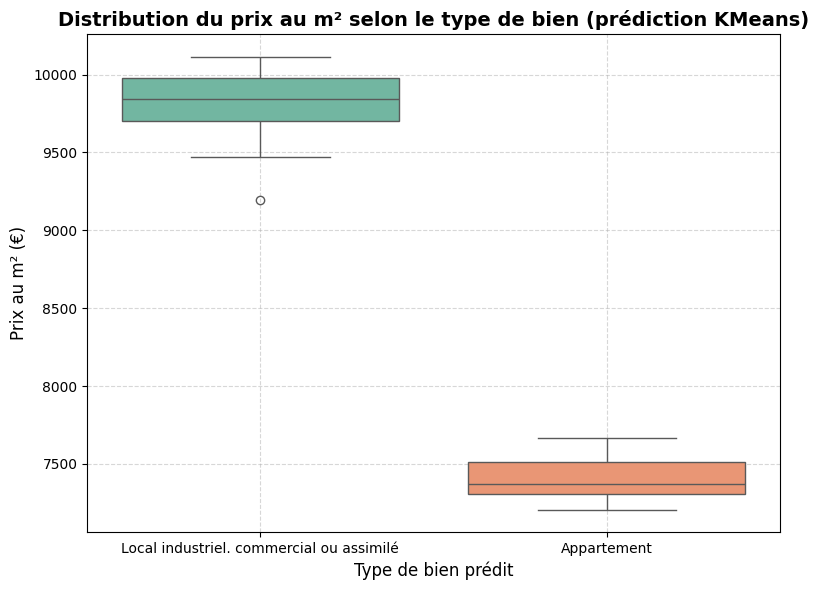

In [176]:
import matplotlib.pyplot as plt
import seaborn as sns

# Taille de la figure
plt.figure(figsize=(8, 6))

# Création du boxplot avec Seaborn
sns.boxplot(
    data=df_echantillon_encoded,
    x="type_local_pred",
    y="prix_m2",
    palette="Set2"
)

# Titre et étiquettes
plt.title("Distribution du prix au m² selon le type de bien (prédiction KMeans)", fontsize=14, fontweight='bold')
plt.xlabel("Type de bien prédit", fontsize=12)
plt.ylabel("Prix au m² (€)", fontsize=12)

# Affichage du graphique
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


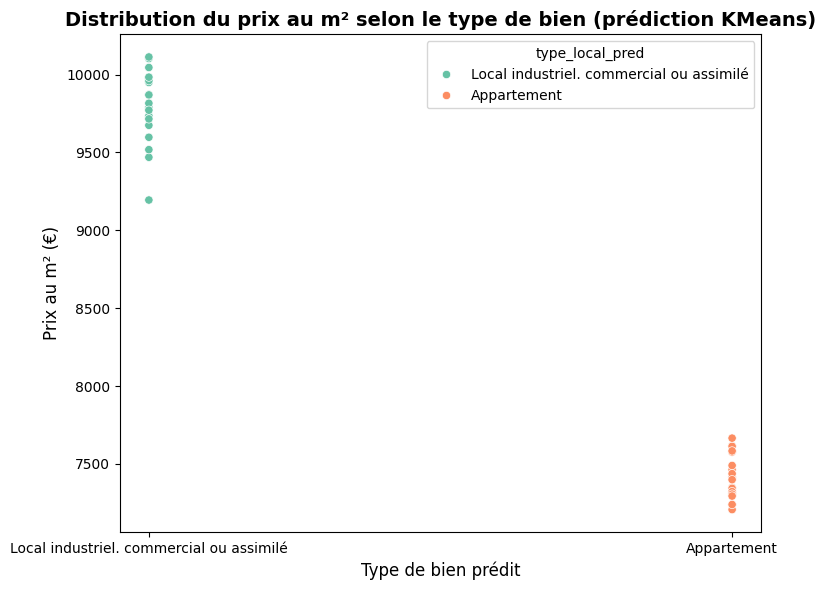

In [177]:
import matplotlib.pyplot as plt
import seaborn as sns

# Taille de la figure
plt.figure(figsize=(8, 6))

# Création du nuage de points avec Seaborn
sns.scatterplot(
    data=df_echantillon_encoded,
    x="type_local_pred",
    y="prix_m2",
    hue="type_local_pred",  # Ajoute une légende de couleurs selon le type de bien
    palette="Set2"
)

# Titre et étiquettes
plt.title("Distribution du prix au m² selon le type de bien (prédiction KMeans)", fontsize=14, fontweight='bold')
plt.xlabel("Type de bien prédit", fontsize=12)
plt.ylabel("Prix au m² (€)", fontsize=12)

# Affichage du graphique
plt.tight_layout()
plt.show()


# Milestone 5 - Analyse et présentation des résultats

Mes conclusions sur l'analyse et les limites de l'exercice :
- Les clusters obtenus semblent bien séparer les deux types de biens sur la base du prix au m².
- Le prix moyen au m² des appartements est de 7 408,78 €, avec une fourchette allant de 7 207,22 € à 7 666,07 €.
- Le prix moyen au m² des locaux industriels, commerciaux ou assimilés est de 9 806,92 €, avec une fourchette entre 9 194,70 € et 10 113,20 €.
- La séparation est donc cohérente avec l’hypothèse selon laquelle ces deux types de biens n’ont pas le même positionnement tarifaire.
- L’association entre 0 et "Appartement" et 1 et "Local industriel" est empirique, il pourrait être inversé. Une validation avec des données labellisées réelles aurait été idéale.
- Vérifier la classification avec des données labellisées pour comparer avec une vérité terrain.
- La segmentation repose uniquement sur le prix au m². Une amélioration possible serait d’ajouter d'autres dimensions discriminantes (ex : code_postal, surface).

**En conclusion : **
* Globalement, le modèle a bien séparé les catégories, mais il repose sur des hypothèses fortes (prix au m² comme unique critère).
* Des ajustements sont possibles pour rendre l’analyse plus robuste.(Comme l'ajout d'autres variables discriminantes)
* L’étape suivante pourrait être d’automatiser la classification et d’intégrer un modèle supervisé basé sur des données labellisées.
